### Import the libraries

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [2]:
in_shape = (100, 100, 3) # input shape 3 chanels color image

In [3]:
model = Sequential()

In [4]:
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=in_shape))

In [5]:
model.add(MaxPool2D(pool_size=(2,2)))

In [6]:
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

In [7]:
model.add(MaxPool2D(pool_size=(2,2)))

In [8]:
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))

In [9]:
model.add(MaxPool2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=3, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0

### List Kernel or Filter or Mask in *Model.layers*

In [13]:
for layer in model.layers:
	print(layer)

In [15]:
for layer in model.layers:
	if 'conv' not in layer.name:
		continue
	kernels, biases = layer.get_weights()
	print(layer.name,'shape:', kernels.shape)

conv2d shape: (3, 3, 3, 32)
conv2d_1 shape: (3, 3, 32, 64)
conv2d_2 shape: (3, 3, 64, 128)


In [16]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
kernels.shape

(3, 3, 3, 32)

In [18]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)
kernel_idx = 0
kernel_i = kernels[:, :, 0, kernel_idx]
print(kernel_i.round(2))

[[0.18 0.92 0.37]
 [0.58 0.71 0.01]
 [0.45 0.05 0.14]]


([], [])

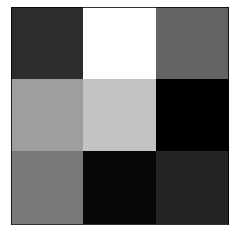

In [19]:
plt.imshow(kernel_i, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])

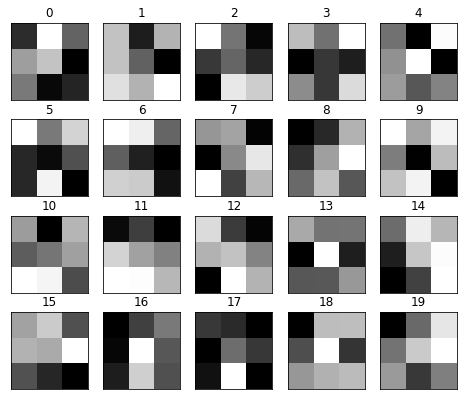

In [20]:
nplots = 20
fig = plt.figure(figsize=(8, 6.8))
for j in range(nplots):
	plt.subplot(4, 5, j+1)
	plt.imshow(kernels[:, :, 0, j], cmap=plt.cm.gray)
	plt.title(j)
	plt.xticks([])
	plt.yticks([])
plt.show()